<b>DOWNLOAD THE DATA</b> - pg(43) 
<br>
    <p>In a typical project ther would be many loopholes and administration <br>
    things to go through but in this project just get the compressed housing.tgz <br>
    file and extract the housing.csv from it.</p>
    <p>Creating a small function to retrieve and extract the data will help to later <br>
    automate the process and even set up scheduled times. This would also help to work <br>
    on all machines instead of just this one.</p>
    <p>The function will serve to retrieve the file from the url, check to see if it <br>
    has a certain directory to store it in, if not it will create it and then it will <br>
    extract the .csv from the .tgz and place it in the directory.</p>


In [1]:
import os  # work with os stuff
import tarfile  # used to work with tar files
from six.moves import urllib  # gets urls

import time  # with with time and sleep

download_root = "https://raw.githubusercontent.com/ageron/handson-ml/master/"  # the place to get the datasets from
housing_path = os.path.join("datasets", "housing")  # the directory this dataset will be saved in
housing_url = download_root + "datasets/housing/housing.tgz"  # the full url of the dataset getting

# two default values of the url and the directory of storage
def fetch_housing_data(url=housing_url, path_=housing_path):
    # ".isdir(<path>)" checks if it has the directory given, this checks where it is, if in
    # if it doesn't ".makedirs(<path>)" will make the directory with the diven path where it is
    if not os.path.isdir(path_):
        os.makedirs(path_)
    tgz_path = os.path.join(path_, "housing.tgz")  # make a open file for what .tgz file will go
    urllib.request.urlretrieve(url, tgz_path)  # get the data from url and put it in the open file
    housing_tgz = tarfile.open(tgz_path)  # take the now full data file and open it as a tarfile, need to work with it
    housing_tgz.extractall(path=path_)  # extract the file contained in it, this is the .csv file which will automatically be added to directory given
    housing_tgz.close()  # close the file because not working with it now
    # try to remove file after use
    # work on this more
    try:
        # works now for some reason
        os.remove(housing_tgz.name)
        print(str(housing_tgz.name) + " removed.")
    except PermissionError as e:
        print(e)

In [2]:
fetch_housing_data()

C:\Users\David Millard\PycharmProjects\helloWorld\ML\chap_two\datasets\housing\housing.tgz removed.


<p>The next function will serve to convert the .csv file gotten above to a pandas dataframe.</p>

In [3]:
import pandas as pd  # import pandas

# function to just convert the csv to a dataframe
# has a default value path_ of the housing_path
def convert_to_df(path_=housing_path):
    path = os.path.join(path_, "housing.csv")  # get the path of csv file
    return pd.read_csv(path)  # return the dataframe

<b>TAKE A QUICK LOOK AT THE DATA STRUCTURE</b> - pg(45)<br> 
    <p>Using the <i>.head()</i>, <i>.tail()</i>, and <i>iloc / loc</i> it can be seen the <br>
    beginning middle and end of the df.</p>

In [4]:
df = convert_to_df()
df.head()  # beginning

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.loc[10000:10005, : ]  # middle

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10000,-121.08,39.02,13.0,1839.0,275.0,752.0,270.0,4.2031,209600.0,INLAND
10001,-121.07,39.05,10.0,1813.0,311.0,827.0,287.0,3.6087,182100.0,INLAND
10002,-121.07,39.04,9.0,2374.0,372.0,884.0,333.0,4.5042,206400.0,INLAND
10003,-121.03,39.05,12.0,1875.0,307.0,806.0,283.0,3.9185,195200.0,INLAND
10004,-121.06,39.04,14.0,1651.0,279.0,633.0,261.0,4.2802,194800.0,INLAND
10005,-121.06,39.04,15.0,1999.0,287.0,585.0,246.0,5.5161,361900.0,INLAND


In [6]:
df.tail()  # end

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [7]:
df.info()  # gets information on rows, columns, types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<p>total_bedrooms are 20,433 meaning some of the districts (207) are missing them. <br>
This will need to be a problem taken care of later because a NAN value won't work here.</p>
<p>Almost all attributes/colums are float/numerical except ocean_proximity which is object.<br>
Knowing this a csv it is likely text and looking through df it shows to be a catagorial mark.</p>

In [8]:
df["ocean_proximity"].value_counts()  # couts all values of ocean_proximity and returns a series of categories and counts

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
df.describe()  # returns a dataframe describing the statistics on numerical columns/attributes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<p>Another good way to get a feel for data working with is to plot a histogram.<br>
<i>A histogram shows the number of instances (vertical axis) that have a given value range (horizontal axis).</i></p>

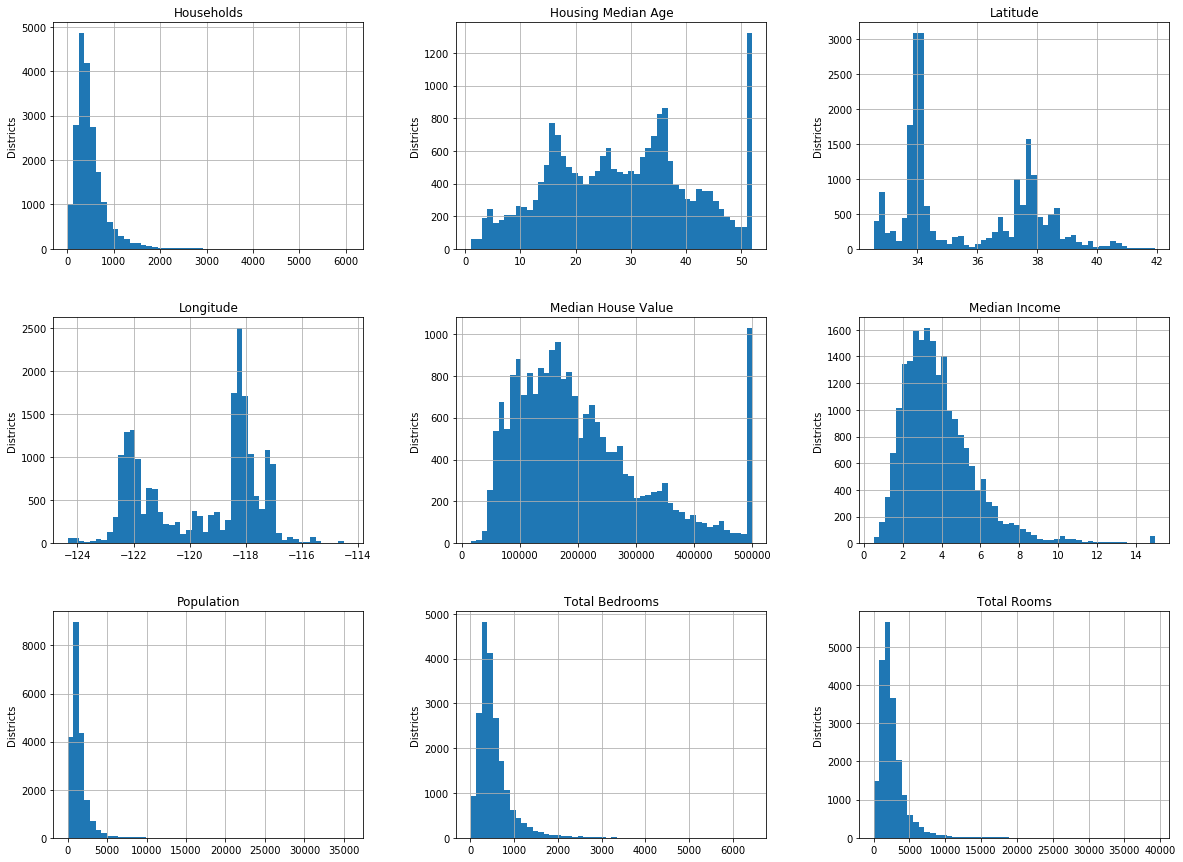

In [10]:
%matplotlib inline  
# this is used to show graphs in jupyter lab
# matplotlib requires somewhere to tell it how and where to render
# jupyter does this automatically but other places need to be told, mayber like the command below
import matplotlib.pyplot as plt  # import plotting stuff

for i in df.hist(bins=50, figsize=(20, 15)):  # use the .hist() function to create histograms of each series of districts and its attributes, then loop through
    for e in i:  
        # making it look pretty
        e.set_ylabel("Districts")
        word_list = e.get_title().split("_")
        word_list = [word.capitalize() for word in word_list]  # use list comprehension instead of enumerate indexing
        word = " ".join(word_list)
        e.set_title(word)
        
plt.show()

<h4>Analyzing the Data and Graphs</h4>

<p>1.</p>
<p>
On the landscape of the districts it looks like there are larger communities <br>
all houses build off of, this is possible in the longitude and latitude. The median income, <br>
total rooms, total bedrooms, population, and households follw a somewhat bell curve shape. <br>
</p>
<p>2.</p>
<p>
The median income is capped at 15.0 and .5 to accomodate rich and poor outliers. <br>
These numbers are in terms of 10,000 dollars = 1 unit.<br>
<i>Pre-processed numbers are common in ML, it isn't a problem but it is something to understand.</i>
</p>
<p>3.</p>
<p>
The median house age and values were both capped as well showing the sudden spike a the right sides. <br>
This could be a series issue if predictions need to made of places above those caps (500,000 and 52). <br>
There are two main options: <br>
&emsp;a. Get the data for those places. <br>
&emsp;b. Remove the districts from the traing set and test set. The system should be ok with instances <br>
&emsp;&emsp;over 500,000 because the algorithm will be trained well enough to scale ok.
</p>
<p>4.</p>
<p>
These attributes will have different scales. <br>
<i>This will be discussed later in the chapter when exploring scaling.</i>
</p>
<p>5.</p>
<p>
Histograms are <u>tail heavy</u>. They extend much farther to right of median than to the left. <br>
This makes it much marder for ML algorithms to detect decent patterns, (somewhat graph bias). <br>
<i>Will be trying to transform these attributes later on in the chapter to have more of a bell-shape distributions.</i>
</p>

<b>CREATE A TEST SET</b> - pg(48)
<p>It may be weird to set aside test data right now before moving on but if you look <br>
into the data too much, the human brain tends to pick up easily on patterns and may <br>
select specific data. Some bias could be there is a pattern of outliers so you <br>
could select only a few to keep the algorithm working as you want but this would <br>
over-estimate the gereralization and then make it too optimistic when in reality <br>
the system isn't so. This is called <i>snooping bias</i>.</p>

<p>Theoretically creating a test set is simple, just randomly pick 20% of the test set.<br>
This function will take 20% random districts from df and return the testing.</p>

In [11]:
import numpy as np  # get numpy for its work on series/df of data

# take the dataframe and ratio of all data frame to use
def split_train_test (data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))  # create a randomly indexed series the same length as the input df
    test_set_size = int(len(data) * test_ratio)  # get how any instances will be used, a percentage of full df
    """this gets 20% test, 80% train"""
    test_indices = shuffled_indices[:test_set_size]  # allocate from the beginning to the test_set_size as the test size, this is in the randomized df
    train_indices = shuffled_indices[test_set_size:]  # allocate from the test_set_size to the end as the training size, this is in the randomized df
    """
    then return two df, both using iloc to return a df of only the instances in eah set
    iloc allows to make a df of all instances of an array using the the row indexes
    iloc[<numpy-array>] - allows to choose specific instances as specificed by the object, it could as for just two elements
    iloc still keeps its functionality with dataframes
    """
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
training_set, testing_set = split_train_test(df, .20)

In [13]:
print(f"{len(training_set)} + {len(testing_set)} = {len(testing_set) + len(training_set)} ... full set")  # showing the length add up to the df total

16512 + 4128 = 20640 ... full set


In [14]:
training_set.head()  # show the randomization

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1175,-121.57,39.48,15.0,202.0,54.0,145.0,40.0,0.8252,42500.0,INLAND
13147,-121.70,38.10,19.0,4896.0,1083.0,2150.0,905.0,3.3398,89700.0,INLAND
3948,-118.61,34.20,16.0,1718.0,467.0,896.0,475.0,3.6296,160900.0,<1H OCEAN
6349,-117.94,34.15,33.0,859.0,144.0,421.0,138.0,4.4821,220100.0,INLAND
13168,-121.40,36.83,11.0,3701.0,739.0,1749.0,654.0,3.0670,207900.0,INLAND


In [15]:
testing_set.head()  # show the randomization

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16517,-121.21,37.80,31.0,699.0,186.0,460.0,170.0,2.7443,94200.0,INLAND
11434,-117.97,33.65,26.0,2379.0,336.0,988.0,346.0,5.3674,339300.0,<1H OCEAN
8321,-118.29,33.95,31.0,2839.0,792.0,2390.0,729.0,2.0000,109800.0,<1H OCEAN
10617,-117.81,33.68,4.0,1545.0,304.0,788.0,296.0,4.5469,500001.0,<1H OCEAN
12243,-116.99,33.75,18.0,9601.0,2401.0,4002.0,2106.0,1.4366,77000.0,INLAND


<p>Though there is an issue with the above solution to setting the sets.<br>
Everytime the program is re-run the test and train sets will change.</p>
<p>There are a few ways to potentially solve this: <br>
&emsp;- run the program and then save the randomized dataframes, like pickles<br>
&emsp;- set the random number generator's seed (ex: np.random.seed(42))<br>
Though these solutions will eventually break the next time the dataset updates.<br>
A good soliution is to use each instances immutable identifier. This could be using <br>
the hash of each identifier to put anything less than or equal to the max hash <br>
in the test and the rest to go into the training.
</p>
<p>This route is the strongest because even if the dataset is refreshed and there <br>
is more, the indenifiers will stay the same and it will still have the original <br>
sets and the new sets integrated with their original ratios without the training and <br>
testing sets getting messed up.</p>
<b><u>Research More into CRC-32</u></b> <br>
<u><i>Below is testing with the hash stuff...</i></u>

In [16]:
from zlib import crc32

# this works with hash and the maximun hash value for any other is 2^32
# the gets a series of the id of each instance and then uses crc32 to return the bit value of each instance, these will never change
print(f"first {crc32(np.int64(df.iloc[0:1, df.index[0]:df.index[1]]))}, second {crc32(np.int64(df.iloc[1:2, df.index[1]:df.index[2]]))}")

first 2455459239, second 3568612187


In [17]:
count = 0

df_index = df.reset_index().copy()

for i in df_index['index']:
    t = crc32(np.int64(i))  # crc32 creates a unique 32bit identifier from a certian indentifier in the dataframe, this being the index indentifier
    if ((2 ** 32 * .2) > t):
        count += 1
        
print(count)
        

4128


In [18]:
df_index.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Continuation of chapter...

In [19]:
from zlib import crc32  # import stuff for crc32

# take an identifier object and the ratio in the test set
def test_set_check(identifier, test_ratio):
    #  use the indentifer to get the hash - then do something im not sure of - and then compare it to the ratio of max hash
    # numpy array of trues and falses
    return crc32(np.int64(identifier)) & 0xffffffff <= test_ratio * 2**32

# take the df, the ratio in test, and the name of the columns with the ids
def split_train_test(data, test_ratio, id_column):
    ids = data[id_column]  # get a series of the ids
    # use pandas .apply() to call a lambda function for all the the instances and either determine if it is or isnt in test
    # the lambda function creates a series of trues and falses to things that return from condition
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))  # lambda function calls test_set_check and uses the row its on and the ratio
    """
    returns a df based on the whether it is test or not
    uses loc to take a numpy array and use what ids it states for the datasets respectively
    loc in this case takes the trues only in a series and when "~" is placed in front it works opposite, for falses
    loc takes boolean arrays/series
    """
    # print(type(in_test_set))
    return data.loc[~in_test_set], data.loc[in_test_set]  

Since the id is not a column it would be wise to use the row index.

In [20]:
df_with_id = df.reset_index().copy()
training_set, testing_set = split_train_test(df_with_id, .2, "index")

In [21]:
testing_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 2 to 20629
Data columns (total 11 columns):
index                 4128 non-null int64
longitude             4128 non-null float64
latitude              4128 non-null float64
housing_median_age    4128 non-null float64
total_rooms           4128 non-null float64
total_bedrooms        4085 non-null float64
population            4128 non-null float64
households            4128 non-null float64
median_income         4128 non-null float64
median_house_value    4128 non-null float64
ocean_proximity       4128 non-null object
dtypes: float64(9), int64(1), object(1)
memory usage: 387.0+ KB


<p>A specific id isn't necessary. An identifier can be formed out of a logical identification. <br>
For example, the location of the places is likely to not change much so a combination of the <br>
longitude and latitude would work fine.</p>
<p>EX:</p>

In [22]:
# don't know why this one is off
df_with_id['id'] = df['longitude'] * 1000 * df['latitude'] 
training_set, testing_set = split_train_test(df_with_id, .2, "id")

In [23]:
testing_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4248 entries, 2 to 20639
Data columns (total 12 columns):
index                 4248 non-null int64
longitude             4248 non-null float64
latitude              4248 non-null float64
housing_median_age    4248 non-null float64
total_rooms           4248 non-null float64
total_bedrooms        4208 non-null float64
population            4248 non-null float64
households            4248 non-null float64
median_income         4248 non-null float64
median_house_value    4248 non-null float64
ocean_proximity       4248 non-null object
id                    4248 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 431.4+ KB


<p>Scikit-Learn also provides a few functions to split databases. Like shown above, is <br>
the function train_test_split which does the same thing but with more features. Some <br>
of the features are a <i>random state</i> parameter that allows to set the random <br>
generator as stated earlier. Can also pass multiple datasets with identical number of rows <br>
and will split them on the same indices, same df refering to one thing but with different kinds <br>
of data (good for df with labels).</p>


In [24]:
from sklearn.model_selection import train_test_split

df_test = df.copy()
training_set, testing_set = train_test_split(df_test, test_size=.2, random_state=42)

In [25]:
testing_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,4128.00000,4128.00000,4128.000000,4128.000000,3921.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,-119.51936,35.58671,28.764293,2610.796269,535.233104,1421.571705,497.750727,3.830338,205500.309593
std,1.99447,2.13276,12.518304,2209.359101,431.299704,1114.023136,387.770570,1.881515,114486.964288
min,-124.19000,32.54000,1.000000,6.000000,2.000000,8.000000,2.000000,0.499900,14999.000000
25%,-121.69000,33.93000,18.000000,1420.000000,294.000000,781.000000,278.000000,2.548500,119275.000000
50%,-118.47000,34.23000,29.000000,2110.000000,428.000000,1160.000000,406.000000,3.500000,178650.000000
75%,-117.99000,37.70000,37.000000,3099.250000,643.000000,1722.000000,598.000000,4.645925,263000.000000
max,-114.58000,41.81000,52.000000,37937.000000,5471.000000,16122.000000,5189.000000,15.000100,500001.000000


In [26]:
training_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.582290,35.643149,28.608285,2642.004784,538.496851,1426.453004,499.986919,3.880754,207194.693738
std,2.005654,2.136665,12.602499,2174.646744,419.007096,1137.056380,380.967964,1.904294,115622.626448
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.810000,33.930000,18.000000,1454.000000,296.750000,789.000000,280.000000,2.566700,119800.000000
50%,-118.510000,34.260000,29.000000,2129.000000,437.000000,1167.000000,410.000000,3.545800,179850.000000
75%,-118.010000,37.720000,37.000000,3160.000000,647.000000,1726.000000,606.000000,4.773175,265125.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<p>Random sampling patterns aren't a fear for large datasets most the time, but if  <br>
smaller or more vulnerable there is a chance on running the risk of introducing bias.<br>
For example, say you are running a survey of 1,000 people in the US, to ensure that the <br>
1,000 people are representative of the whole population it would have to be taken into <br>
account that 51% are male and 49% are female. This is called <i>stratified sampling</i> and <br>
the population is divided into groups called <i>strata</i> and the right number of instances are <br>
sampled from <i>stratum</i> to guarantee it is representative of whole population.</p>

<p>Now in this projects case, the medium income is an important factor and it is <br>
necessary to keep it representative in both the testing and training cases.</p> 
<p>Since this attribute is a continuos numerical, it would need to have a category attribute.<br>
Looking at the graph of the median income, most values are clustered around 2 and 5. Though <br>
some values go far beyond 6. (It is also important to have a sufficent number of instances for <br>
each stratum or else the estimate may be biased). <u>This means there shouldn't be too many strata <br>
and each stratum should be large enough</u>.</p>

<p>In this case, creating an income category attribute where it is each median income <br>
divided by 1.5 then rounded up and keeping only those 5 or below and merging all above to 5.</p>

In [27]:
df_cat = df.copy()  # copy for testing purposes 

df_cat['cat'] = np.ceil(df_cat['median_income'] / 1.5)  # go through each instance and make their 'cat' attribute their median income divided by 1.5
# .where() checks the df for the input condition and sets anthing that doesn't satisfy the conditon with the second(other) parameter
# inplace also means it makes changes in the dataframe itself
df_cat['cat'].where(df_cat['cat'] < 5, 5.0, inplace=True)

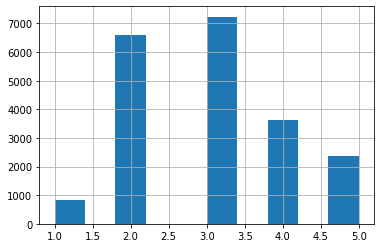

In [28]:
df_cat['cat'].hist()  # represent the data graphicaly

In [29]:
df_cat['cat'].describe()  # statistically

count    20640.000000
mean         3.006686
std          1.054618
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: cat, dtype: float64

With right amount of stratas and the stratums set right, the cat column can be used to split <br>
the testing and training data. <i>Stratified sampling</i> on the income category.

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit  # stratified shuffle split to shuffle based on the stratified data

# create a stratified split object that will take in the number of strats splitting by, the test size, and the randmom state seed
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

print(split)

# the .split() method takes the df splitting and the strat column to represent
# this uses a generator to spit out a tuple of an array of test and train
for train_index, test_index in split.split(df_cat, df_cat['cat']):
    print(train_index)
    print(test_index)
    # then use loc or iloc to take in an array and use only those instances
    strat_train_set = df_cat.loc[train_index]
    strat_test_set = df_cat.loc[test_index]

# the split method creates a gener
print(split.split(df_cat, df_cat['cat']))

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)
[17606 18632 14650 ... 13908 11159 15775]
[ 5241 10970 20351 ...  4019 12107  2398]
<generator object BaseShuffleSplit.split at 0x000001F6A10D6E48>


In [31]:
strat_train_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cat
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,3.006541
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,1.054602
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,2.000000
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,3.000000
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,5.000000


In [32]:
strat_test_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cat
count,4128.000000,4128.000000,4128.000000,4128.000000,4079.000000,4128.000000,4128.00000,4128.000000,4128.000000,4128.000000
mean,-119.545187,35.600998,28.585029,2687.902132,549.484187,1448.220446,509.45688,3.850998,206315.401647,3.007267
std,2.010260,2.127489,12.630172,2345.868226,454.414696,1197.088364,407.59254,1.879270,114170.048854,1.054808
min,-124.180000,32.550000,1.000000,2.000000,1.000000,5.000000,1.00000,0.499900,14999.000000,1.000000
25%,-121.780000,33.920000,18.000000,1474.000000,301.000000,805.750000,283.00000,2.543000,118975.000000,2.000000
50%,-118.455000,34.220000,28.000000,2158.500000,441.000000,1172.000000,416.00000,3.514750,181300.000000,3.000000
75%,-117.980000,37.690000,37.000000,3171.000000,653.000000,1754.000000,613.00000,4.739700,269025.000000,4.000000
max,-114.560000,41.950000,52.000000,32627.000000,6445.000000,28566.000000,6082.00000,15.000100,500001.000000,5.000000


Notice their median income averages are really close.<br>
Now comparing the value counts in the testing set and the full df...

In [33]:
df_cat['cat'].value_counts() / len(df_cat)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: cat, dtype: float64

In [34]:
strat_test_set['cat'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: cat, dtype: float64

<p>The test subset represents the original df's closely.</p>
<p>Finally the 'cat' attribute should be removed from the sets because it is unnecessary.</p>

In [35]:
# set_ is a combined df of the training and testing set
for set_ in (strat_train_set, strat_test_set):
    print(set_)
    # drop removes a certain column or row
    # axis is 0 for rows and 1 for axis
    # inplace is in the sets themself
    # drop then removes the 'cat' access in the combined sets which are in place
    set_.drop('cat', axis=1, inplace=True)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   
...          ...       ...                 ...          ...             ...   
6563     -118.13     34.20                46.0       1271.0           236.0   
12053    -117.56     33.88                40.0       1196.0           294.0   
13908    -116.40     34.09                 9.0       4855.0           872.0   
11159    -118.01     33.82                31.0       1960.0           380.0   
15775    -122.45     37.77                52.0       3095.0           682.0   

       population  households  median_income  media

In [36]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,76400.0,INLAND
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,134000.0,NEAR OCEAN
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,311700.0,<1H OCEAN
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,133500.0,INLAND


<p>The 'cat' attribute has been removed from the dataframes.</p>
<p>A lot of time has been spent on the testing and training sets, while it may seem <br>
like a lot it is often a neglected important part of any ML project</p>
<p>More ideas about like things will be discussed in cross validation.</p>

<b>DISCOVER AND VISUALIZE THE DATA TO GAIN INSIGHTS</b> - pg(53)
<p>The goal now is to delve a little more deeper into the data. Its time to put the test set aside <br>
and work with the training set to look for patterns and such. <i>Also if working with a large <br>
training set it is an option to make another set off of it for exploration</i>.</p>
<p>In this case it is quite small so we can just work with a copy.</p>

In [37]:
df = strat_train_set.copy()

<b>VISUALIZING GEOLOGICAL DATA</b> - pg(54)
<p>Since there are longitudes and latitudes it won't hurt to visualize geological data. To do this a <br>
scatterplot would be useful.</p>

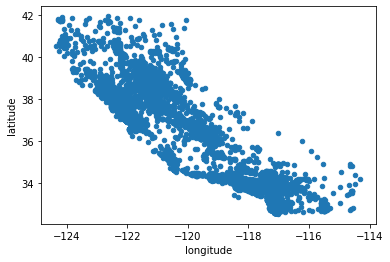

In [38]:
# .plot() on a pd df makes a plot of the df, it has optional default values of 
# kind='' which selects the type of graph, 
# x='' which decides what will be the x axis,  
# y='' which decides what will be the y axis
df.plot(kind='scatter', x='longitude', y='latitude')

<p>Looks like Cali. It is hard to see any real pattern in the visual. Setting alpha to 0.1 will make <br>
it much easier to see density of data points. <i>I think alpha works with opacity</i>.</p>


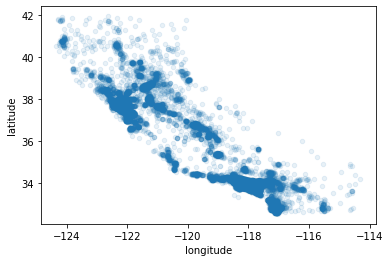

In [39]:
# aplha is another default optional value, it works with the opacity of data points
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

<p>With alpha set it is much easier to see high-density areas, which look like the Bay, San-Diego, and Los <br>
Angeles (<i>As thought before</i>). Playing with the paramerters will make patterns stand out more.</p>
<p>Making the radius of each circle to represent a district's population and making the color represent the price.<br>
This uses (<i>option s as the population sized circles</i>) and (<i>option c as the colored price</i>). Working with the colar will <br>
use the pre-definded (<i>color map called "jet" option cmap that ranges from blue low values to red high values</i>).</p>

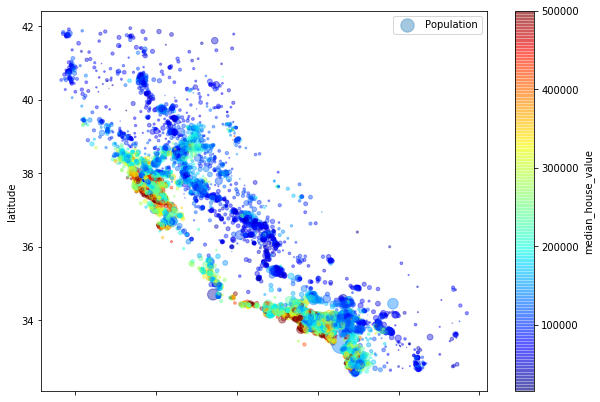

In [61]:
# darken the alpha because colors will get lighter, 
""" 
"s" is the s axis which is size of data points, use population column from df divided by 100 do keep the circles small, They are large and need to fit on graph 
needs to change the color of each value from population so need to call df[<attribute>] to perform action for each value in graph
"""
# "label" sets the label for what each data point represents
# "figsize" sets the size of the graph
"""" 
"c" is the axis that controls color of data points, default of black and white color, it doesn't need the column specifically like for the s axis, \
the function is being called on df so it knows attributes
"""
# "cmap" is the deafault color bar, "plt" comes with premade color bars like jet, use plt".get_cmap()" to call a color bar
# "colorbar" sets the color bar to be displayed

df.plot(kind='scatter', x='longitude', y='latitude', alpha=.4, s=df['population']/100, 
        label='Population', figsize=(10, 7), c='median_house_value', cmap=plt.get_cmap('jet'), 
        colorbar=True)
plt.legend()  # think this is supposed to make legends appear but it happens automatically in lab

<p>The graph shows that there is a relation between location and housing prices and population density. It will <br>
likely be useful to create a clustering algorithm to detect main clusters and measure proximity to the cluseters. <br>
The ocean proximity attribute could prove useful but because Northern Cali doesn't follow these rules it is not a simple rule.</p>

<b>LOOKING FOR CORRELATIONS</b> - pg(56) 
<p></p>